# Lead Scoring

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>

## Goals and Objectives<br>

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.<br>
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load the data

In [2]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Reading and Describing the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [6]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# Converting all the selects to NaN 
df = df.replace('Select', np.nan)

In [8]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Deleting the columns having missing values more than 40% as imputing them will be risky for our analysis.
threshold = 0.40
df = df.drop(columns=df.columns[df.isnull().mean() > threshold])

In [10]:
df.shape

(9240, 30)

In [11]:
# Deleting the column Prsopect ID as it is not necessary for our analysis
df = df.drop('Prospect ID', axis=1)

In [12]:
df.shape

(9240, 29)

In [13]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
df.isnull().mean()*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [15]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    df[feature] =df[feature].apply(lambda x : 1 if x=='Yes' else 0)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [16]:
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

# Imputing the missing values

In [17]:
df['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [18]:
# Drooping the column city as it is not required
df=df.drop("City", axis=1)

In [19]:
df.groupby('Specialization').size()

Specialization
Banking, Investment And Insurance    338
Business Administration              403
E-Business                            57
E-COMMERCE                           112
Finance Management                   976
Healthcare Management                159
Hospitality Management               114
Human Resource Management            848
IT Projects Management               366
International Business               178
Marketing Management                 838
Media and Advertising                203
Operations Management                503
Retail Management                    100
Rural and Agribusiness                73
Services Excellence                   40
Supply Chain Management              349
Travel and Tourism                   203
dtype: int64

In [20]:
# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other_Specialization')
df['Specialization'].isnull().sum()

0

In [21]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [22]:
# We can remove column Tag as it is not important for our analysis
df=df.drop("Tags", axis=1)

In [23]:
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [24]:
df.groupby('What matters most to you in choosing a course').size()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
dtype: int64

In [25]:
# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
df['What matters most to you in choosing a course'].isnull().sum()

0

In [26]:
df.groupby('Country').sum()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Country,,,,,,,,,,,,,,,,,,,,,
Asia/Pacific Region,1202856,APIAPI,GoogleGoogle,0,0,1,3.0,1667,2.00,SMS SentConverted to Lead,...,0,0,0,0,0,0,0,0,0,SMS SentModified
Australia,7869421,APILanding Page SubmissionLanding Page Submiss...,Organic SearchGoogleGoogleDirect TrafficGoogle...,1,0,3,60.0,8694,49.00,Email OpenedUnreachableSMS SentEmail OpenedEma...,...,0,0,0,0,0,0,0,0,5,Email OpenedModifiedModifiedEmail OpenedEmail ...
Bahrain,4335281,Landing Page SubmissionLanding Page Submission...,Referral SitesDirect TrafficDirect TrafficDire...,1,0,4,29.0,5294,18.00,Email OpenedPage Visited on WebsiteEmail Opene...,...,0,0,0,0,0,0,0,0,5,Email OpenedPage Visited on WebsiteEmail Opene...
Bangladesh,1167236,Landing Page SubmissionLanding Page Submission,Direct TrafficDirect Traffic,1,0,1,8.0,2192,5.00,SMS SentSMS Sent,...,0,0,0,0,0,0,0,0,2,SMS SentModified
Belgium,1253977,Landing Page SubmissionLanding Page Submission,Direct TrafficGoogle,0,0,0,9.0,310,6.00,Email OpenedEmail Opened,...,0,0,0,0,0,0,0,0,0,Email OpenedEmail Opened
Canada,2444582,Landing Page SubmissionLanding Page Submission...,Direct TrafficyoutubechannelDirect TrafficOrga...,1,0,0,22.0,1079,11.33,Email OpenedUnsubscribedSMS SentSMS Sent,...,0,0,0,0,0,0,0,0,2,Email OpenedUnsubscribedSMS SentModified
China,1228865,Landing Page SubmissionAPI,Direct TrafficGoogle,0,0,0,4.0,383,3.00,Email OpenedOlark Chat Conversation,...,0,0,0,0,0,0,0,0,1,Email OpenedModified
Denmark,591612,Landing Page Submission,Google,0,0,1,4.0,1200,4.00,SMS Sent,...,0,0,0,0,0,0,0,0,1,SMS Sent
France,3768459,Landing Page SubmissionLanding Page Submission...,GoogleDirect TrafficGoogleDirect TrafficDirect...,1,0,3,40.0,4480,16.73,Email OpenedSMS SentSMS SentPage Visited on We...,...,0,0,0,0,0,0,0,0,5,Email OpenedSMS SentModifiedModifiedEmail Open...


In [27]:
# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
df['Country'] = df['Country'].replace(np.nan, 'India')
df['Country'].isnull().sum()

0

In [28]:
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [29]:
df.groupby('What is your current occupation').size()

What is your current occupation
Businessman                8
Housewife                 10
Other                     16
Student                  210
Unemployed              5600
Working Professional     706
dtype: int64

In [30]:
# As more than 60% of data is for "Unemployed" it is safer to impute the missing values with "Unemployed"
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')
df['What is your current occupation'].isnull().sum()

0

In [31]:
df.isnull().sum()

Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [32]:
# As only a few no. of rows have missing values it is safer to drop those rows as we wont lose much of our data
df = df.dropna(how='any',axis=0) 

In [33]:
df.shape

(9074, 27)

In [34]:
# Checking for %of data we have lost
(9240-9074)/9240*100

1.7965367965367967

In [35]:
100*df.isnull().mean()

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

# Outliers Treatment

In [36]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

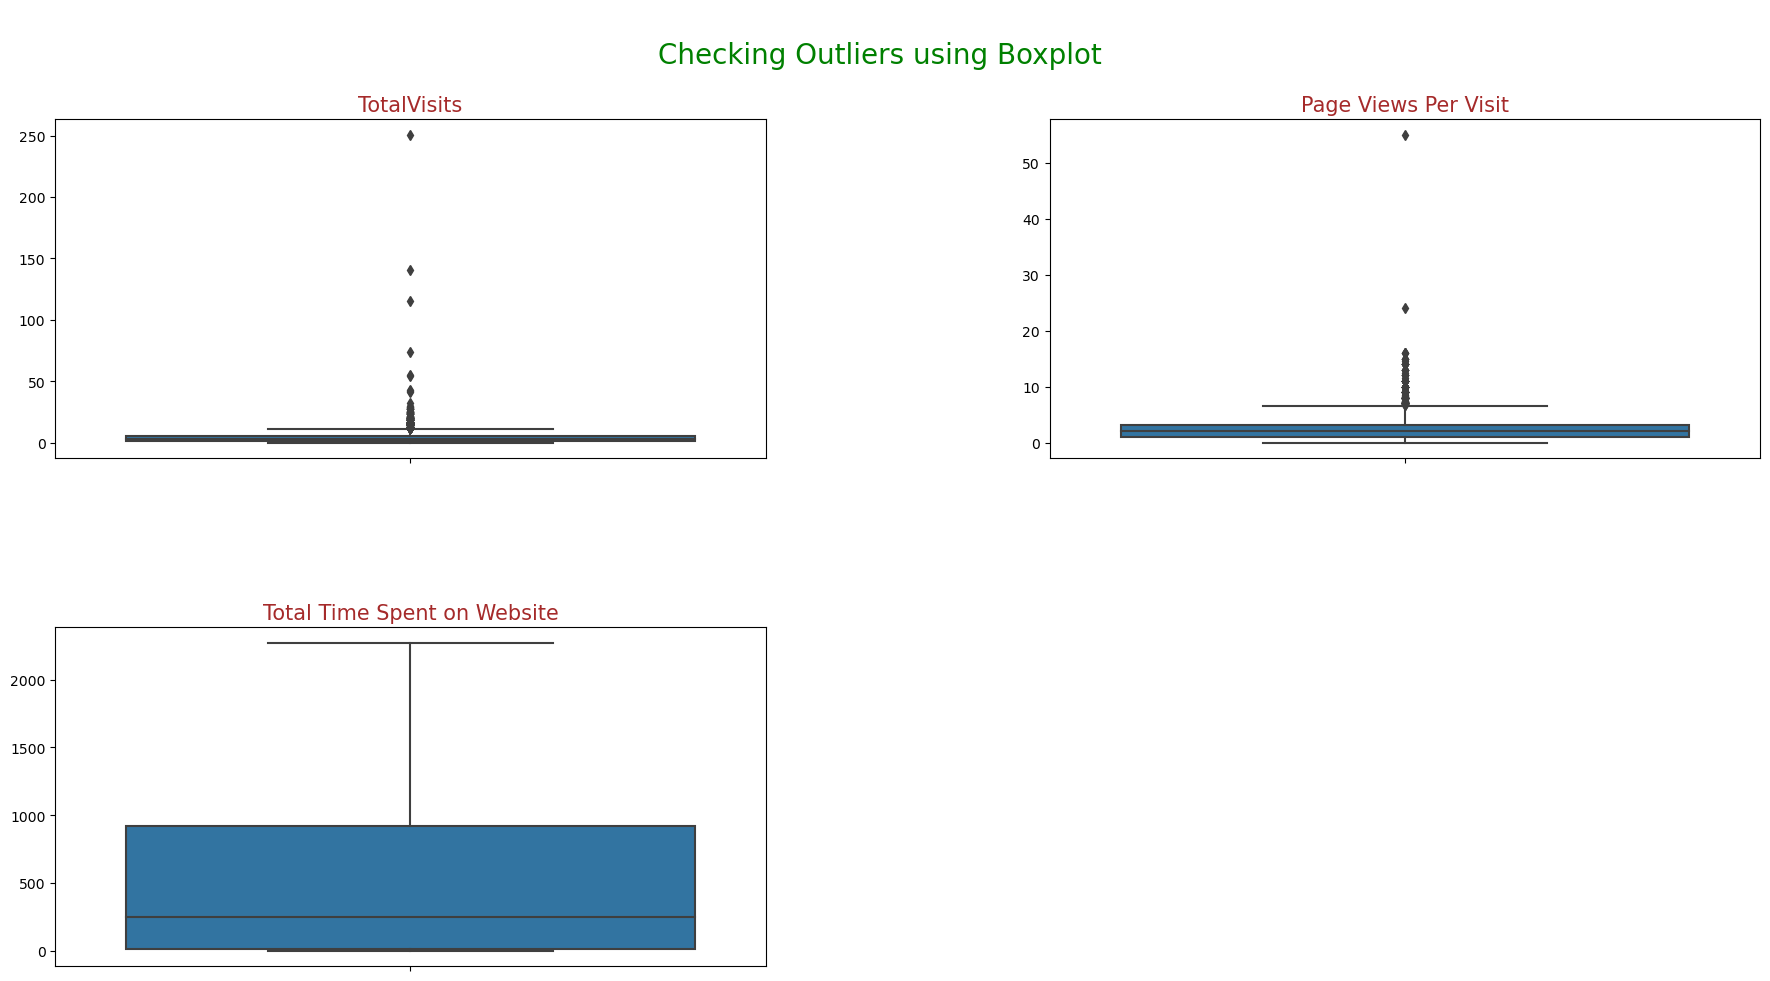

In [37]:
# Checking outliers for numerical variables other than target variable 

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df,num_cols)

In [38]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [39]:
# Checking outliers for numerical variables other than target variable 

capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 

Outlier_treatment(df,capping_cols)

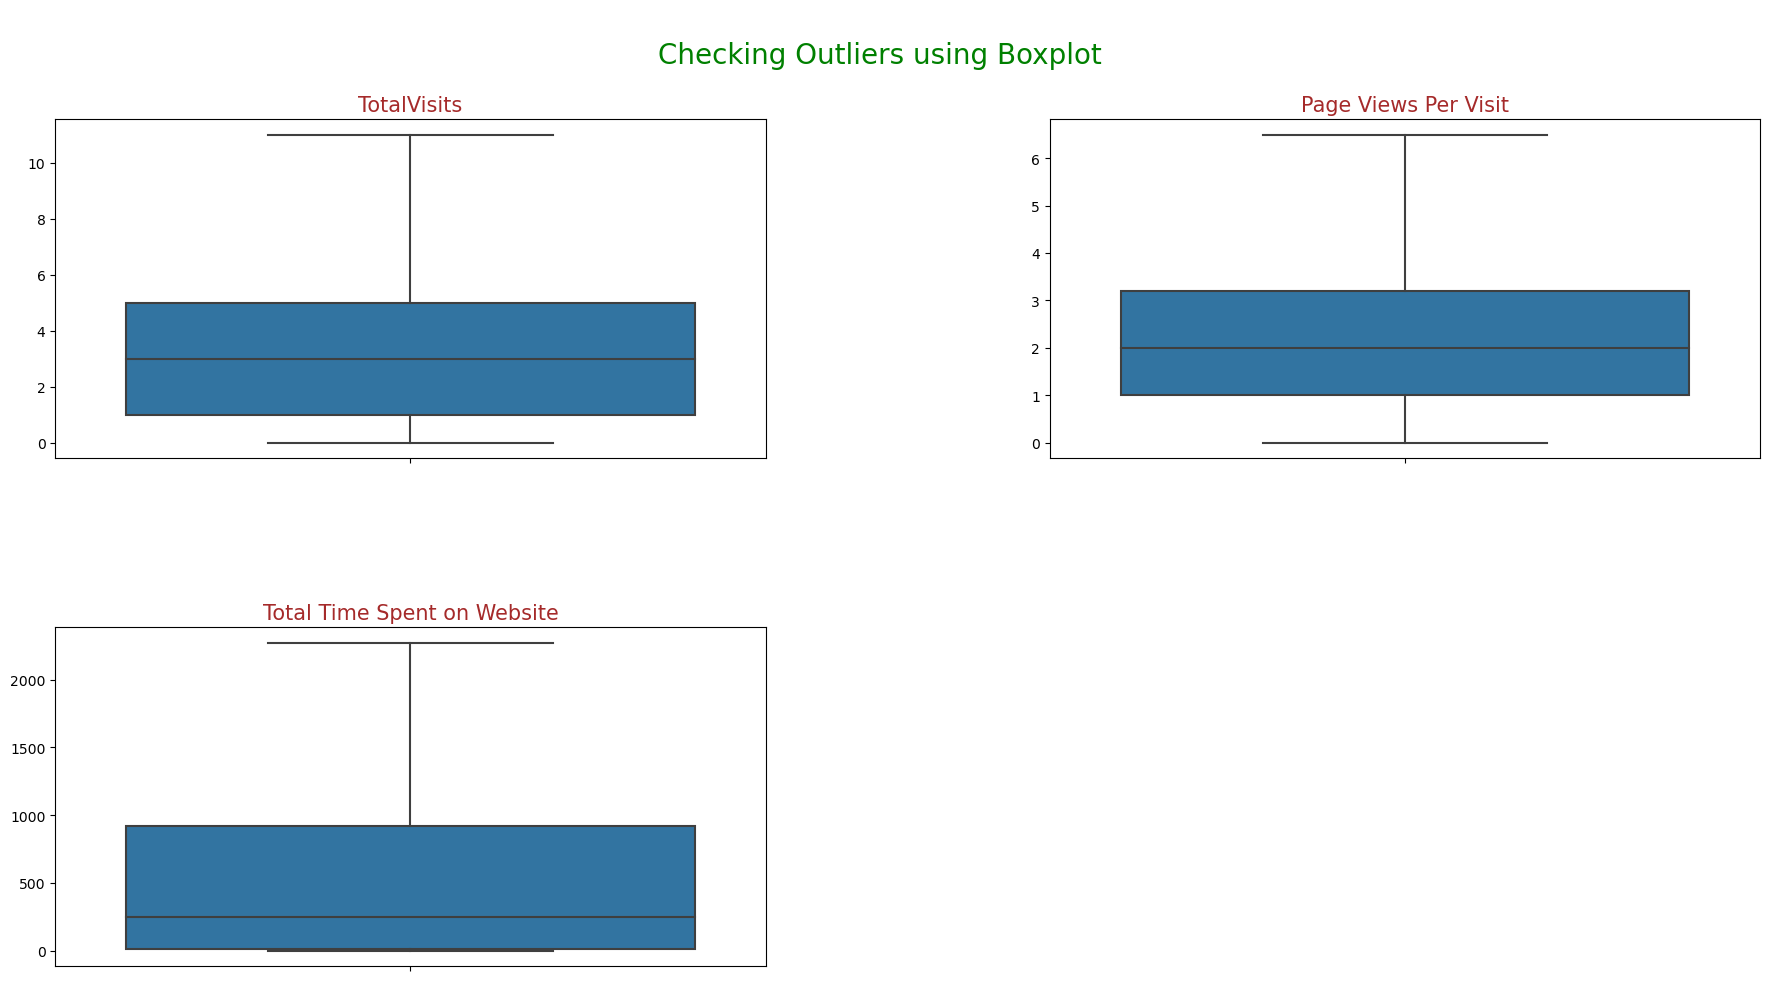

In [40]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df,num_cols)

# Exploratory Data Analysis

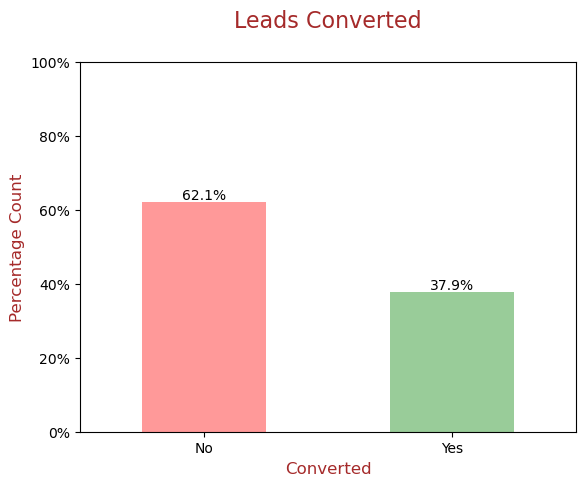

In [41]:
# ploting the results on bar plot

ax=(100*df["Converted"].value_counts(normalize=True)).plot.bar(color=["Red","Green"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Brown'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

From the above graph it is clear that only 37.9% of leads are getting converted

In [42]:
# Separating the categorical and numerival columns
categorical_cols = df.select_dtypes(include=['category','object']).columns.tolist()

# Printing the selected columns

print(categorical_cols)

['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']


In [43]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Printing the selected columns

print(numerical_cols)

['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


In [44]:
numerical_df=df[['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']]
numerical_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0


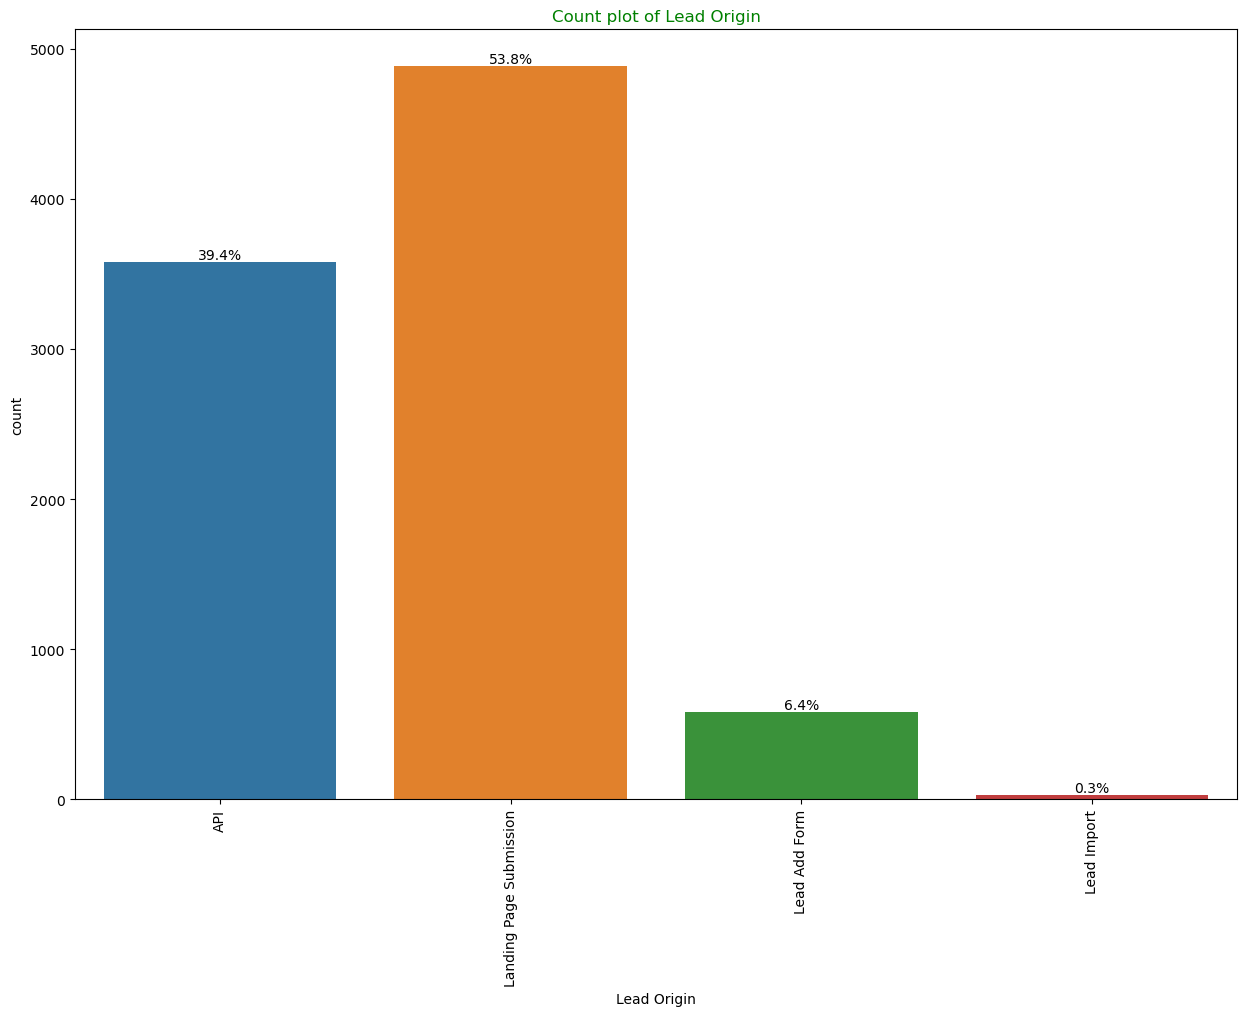

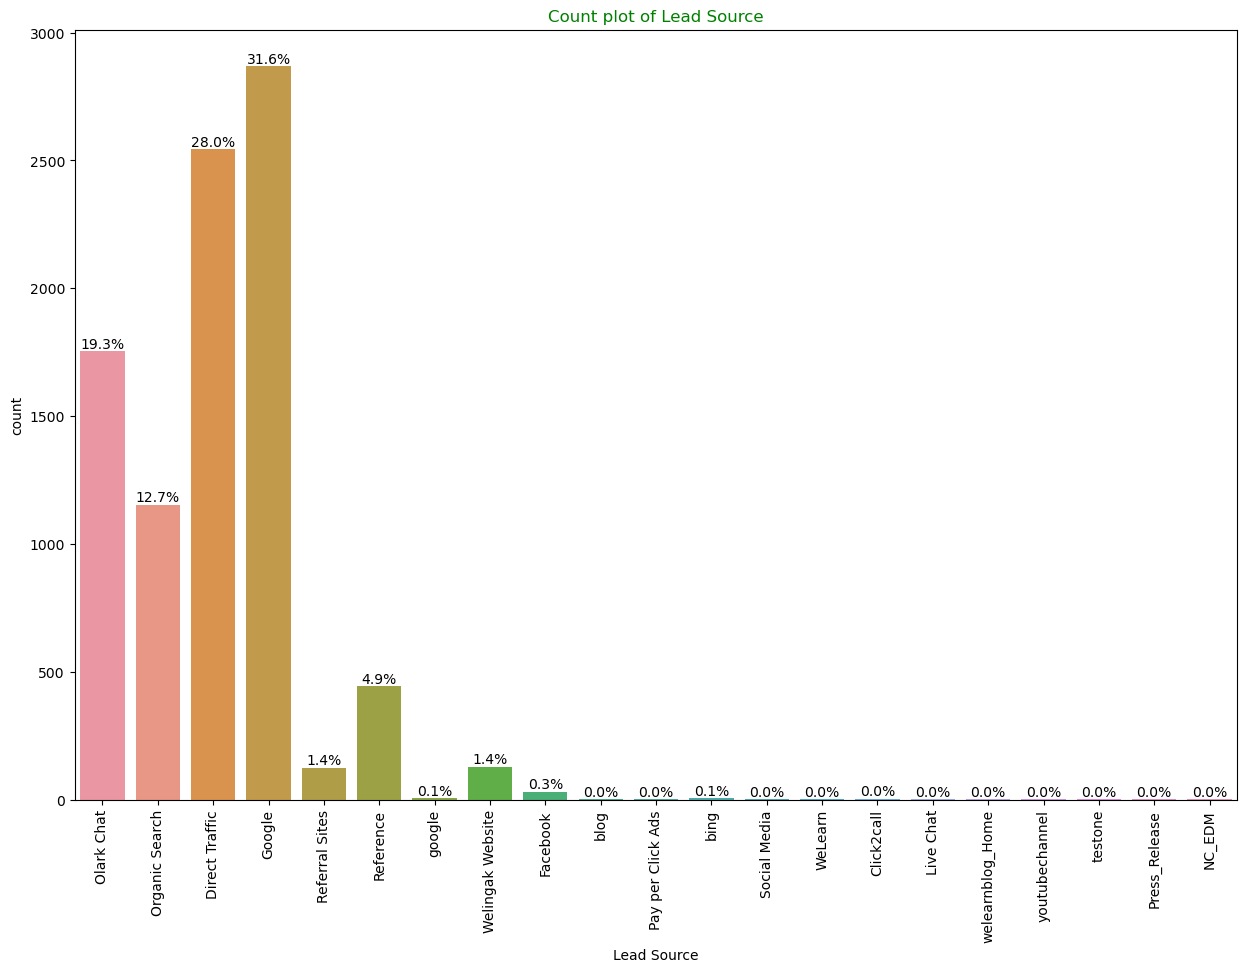

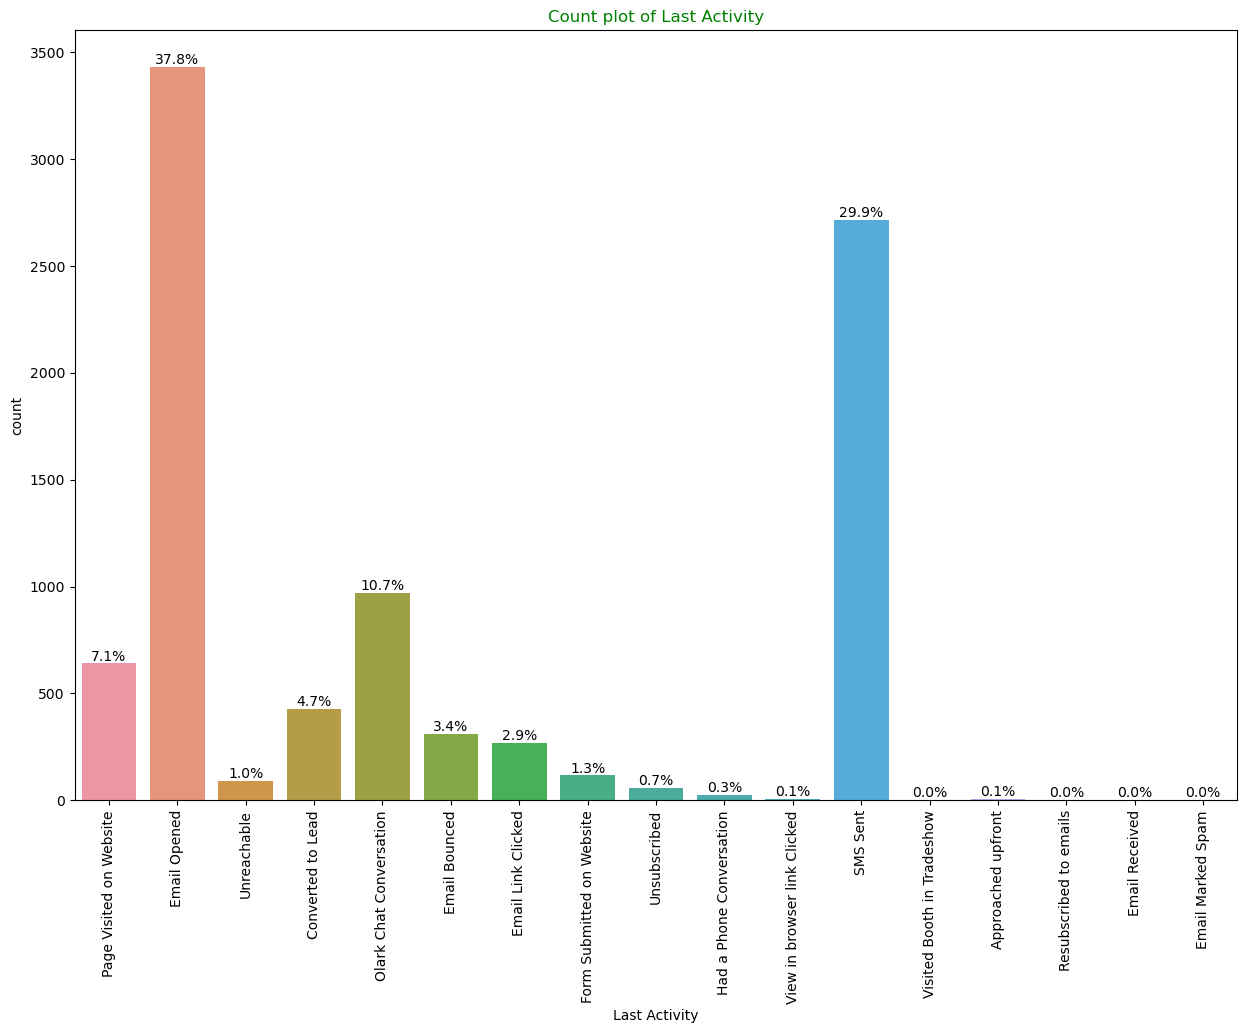

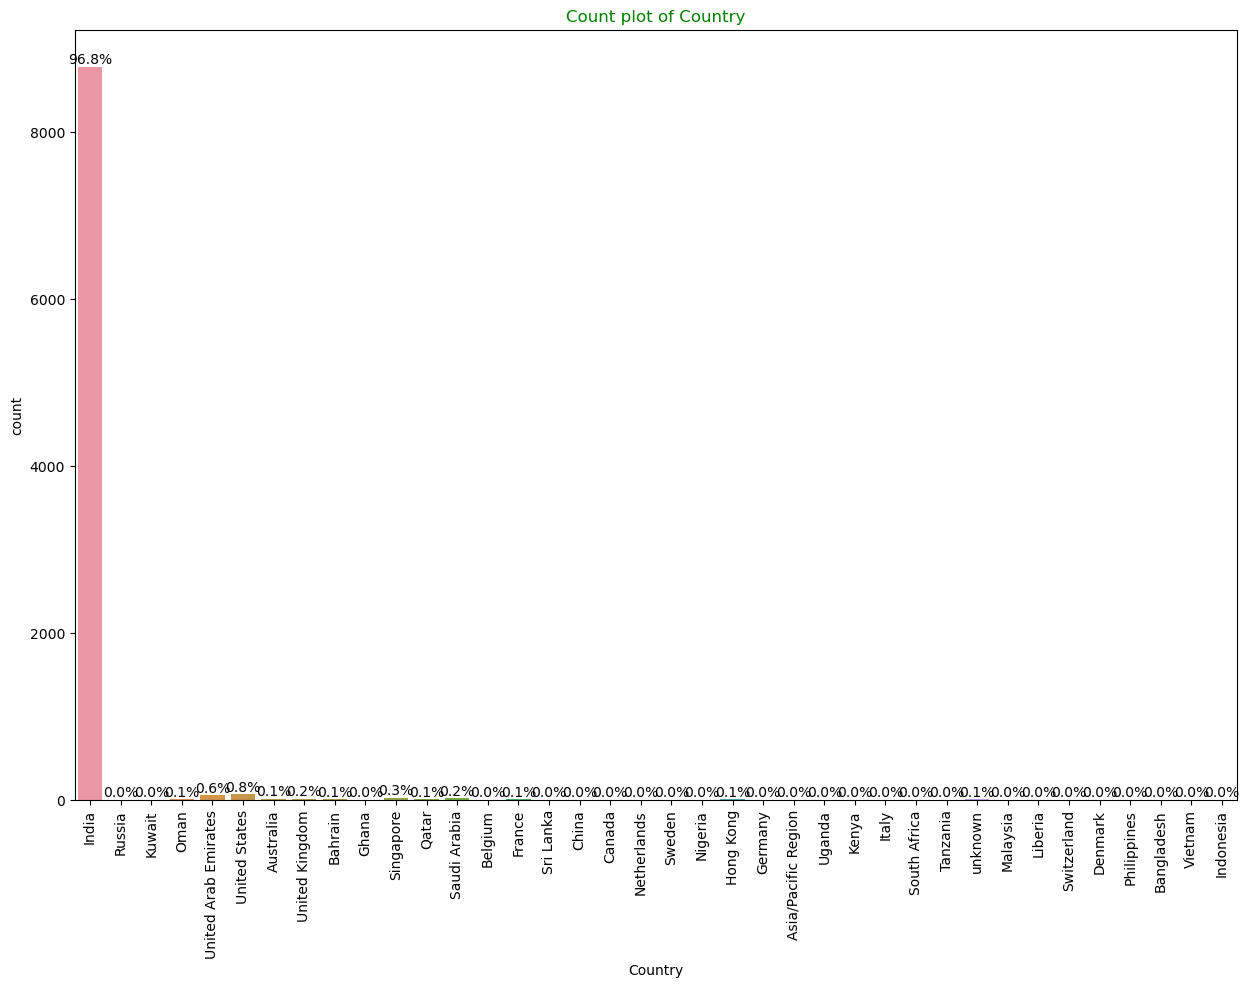

In [45]:
for i in categorical_cols[:4]:
    
    plt.figure(figsize=[15,10])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

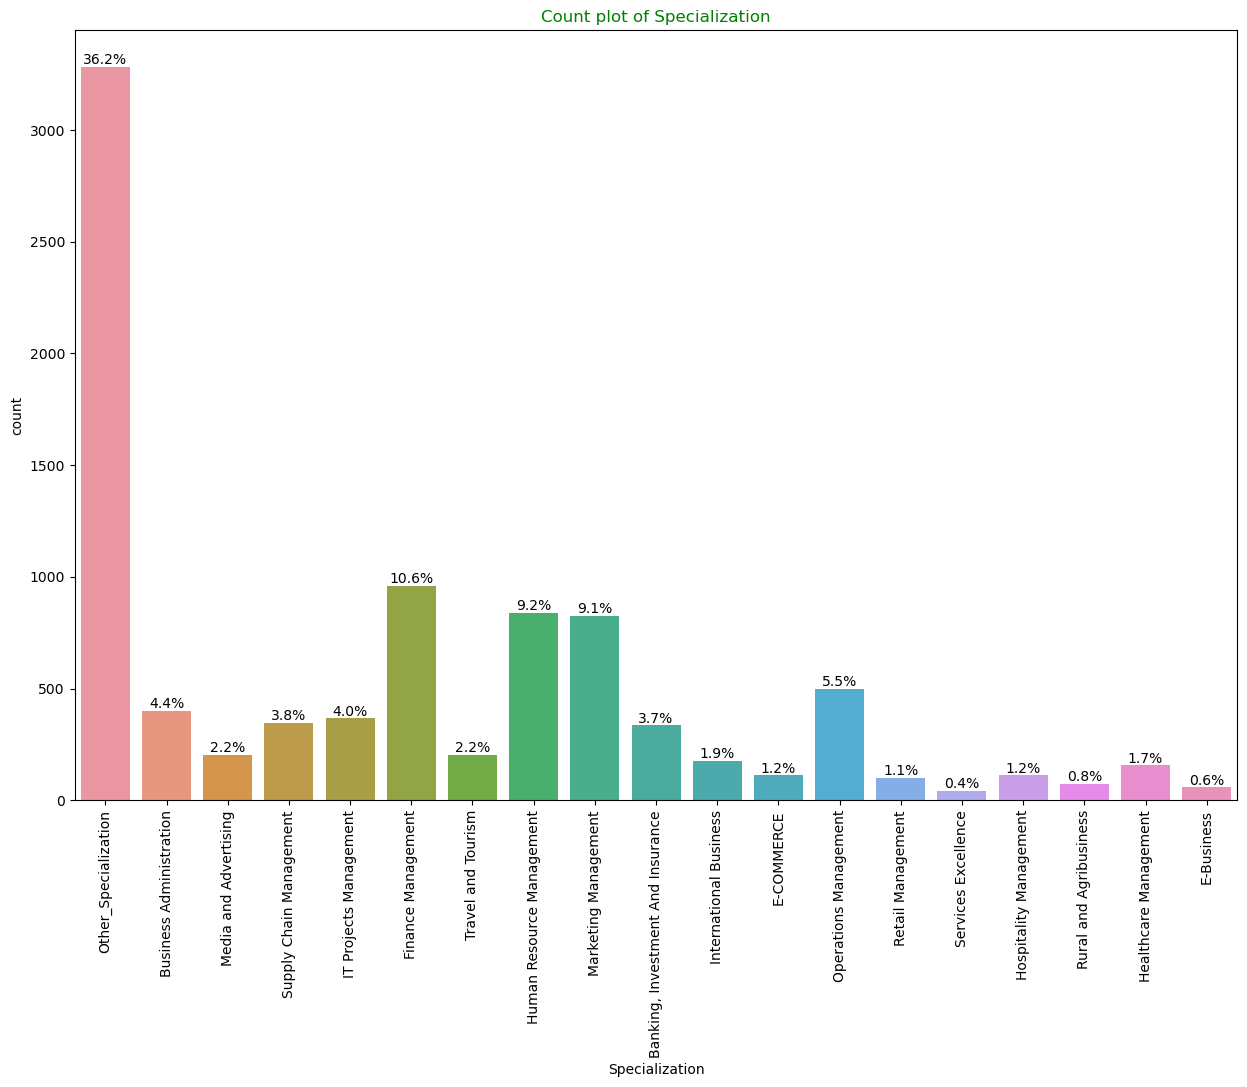

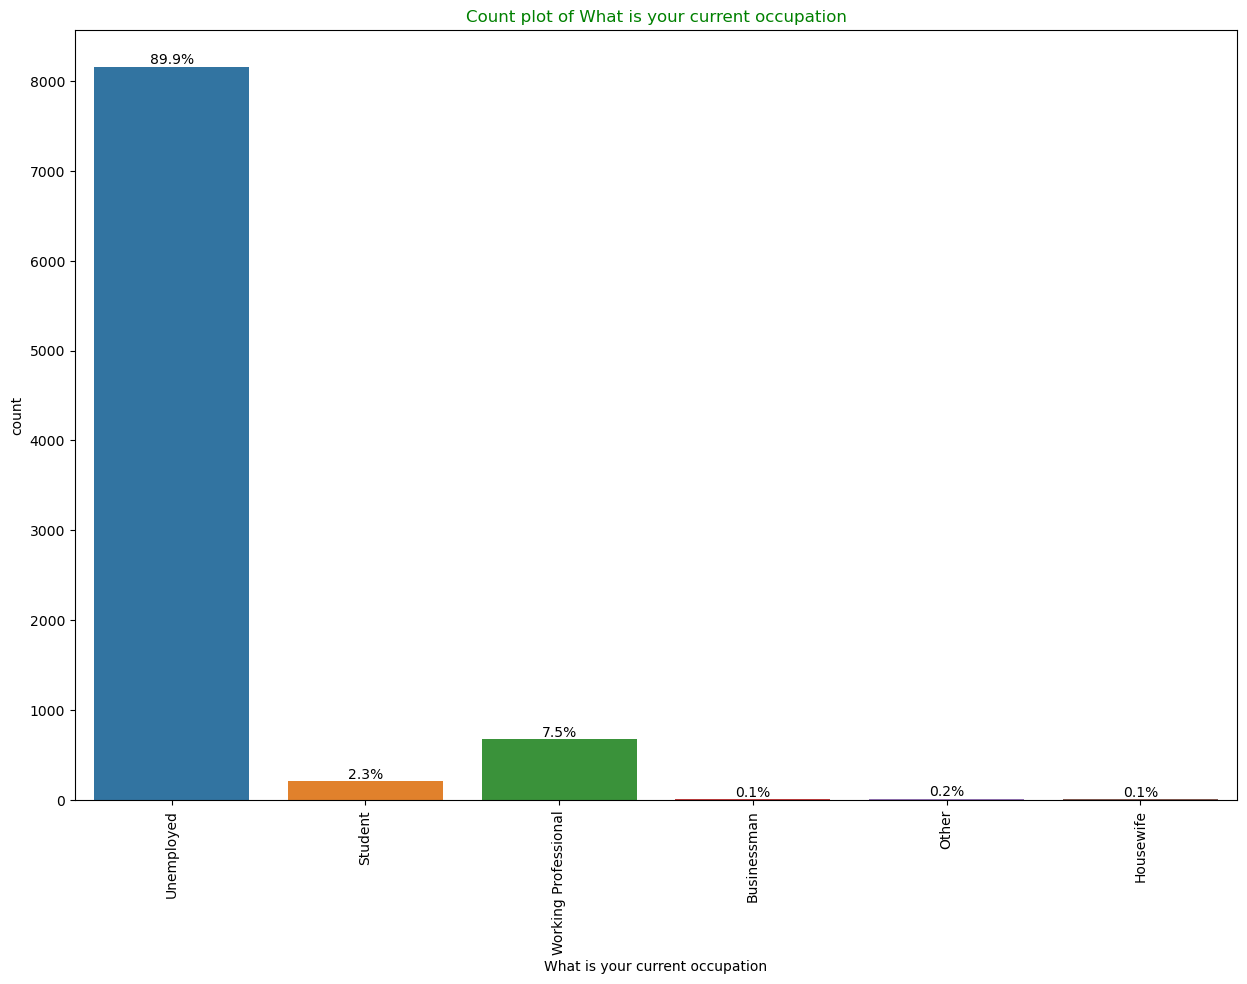

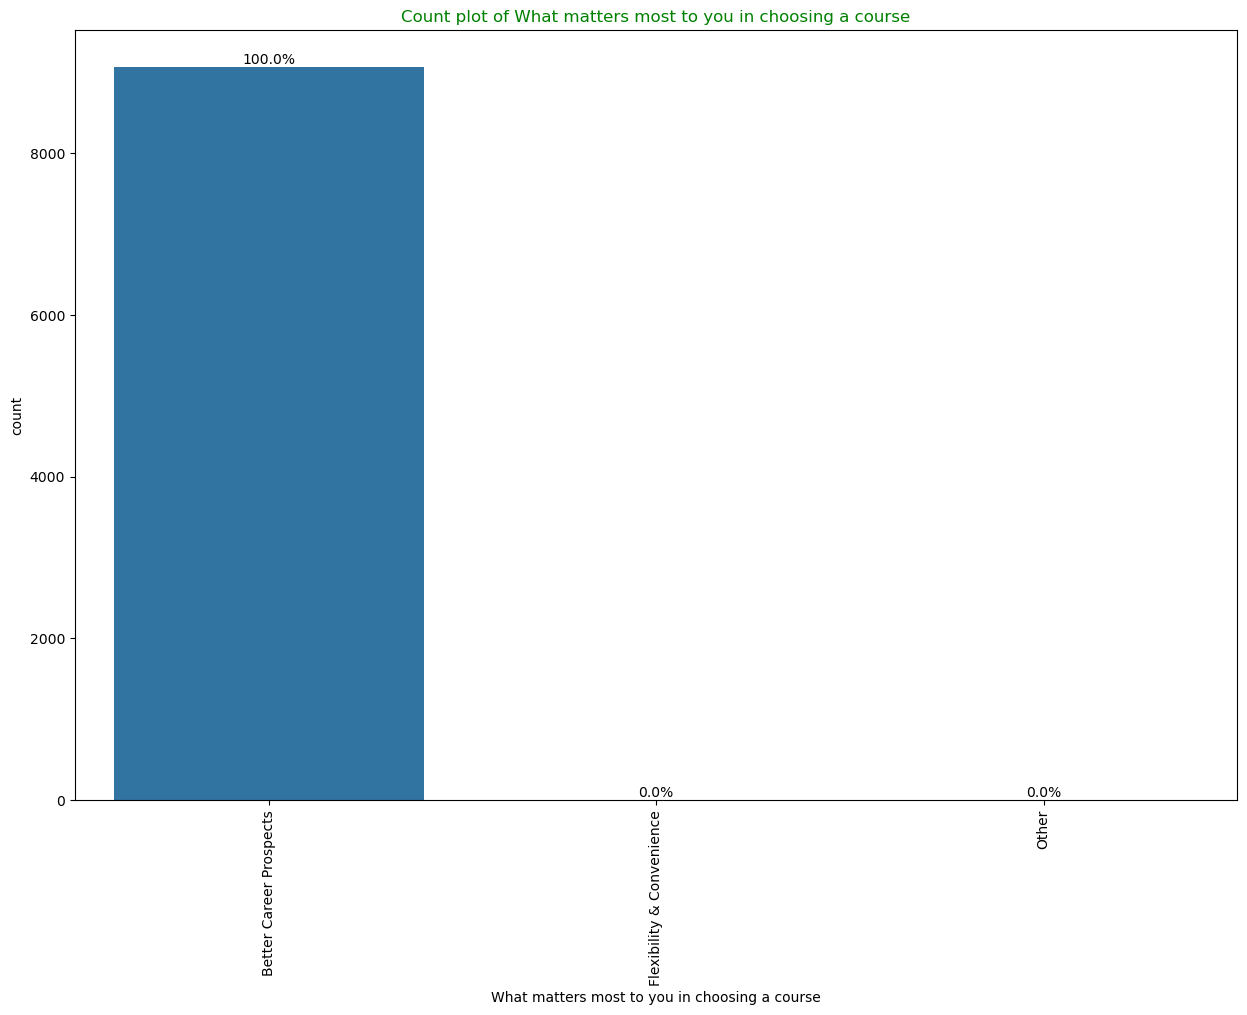

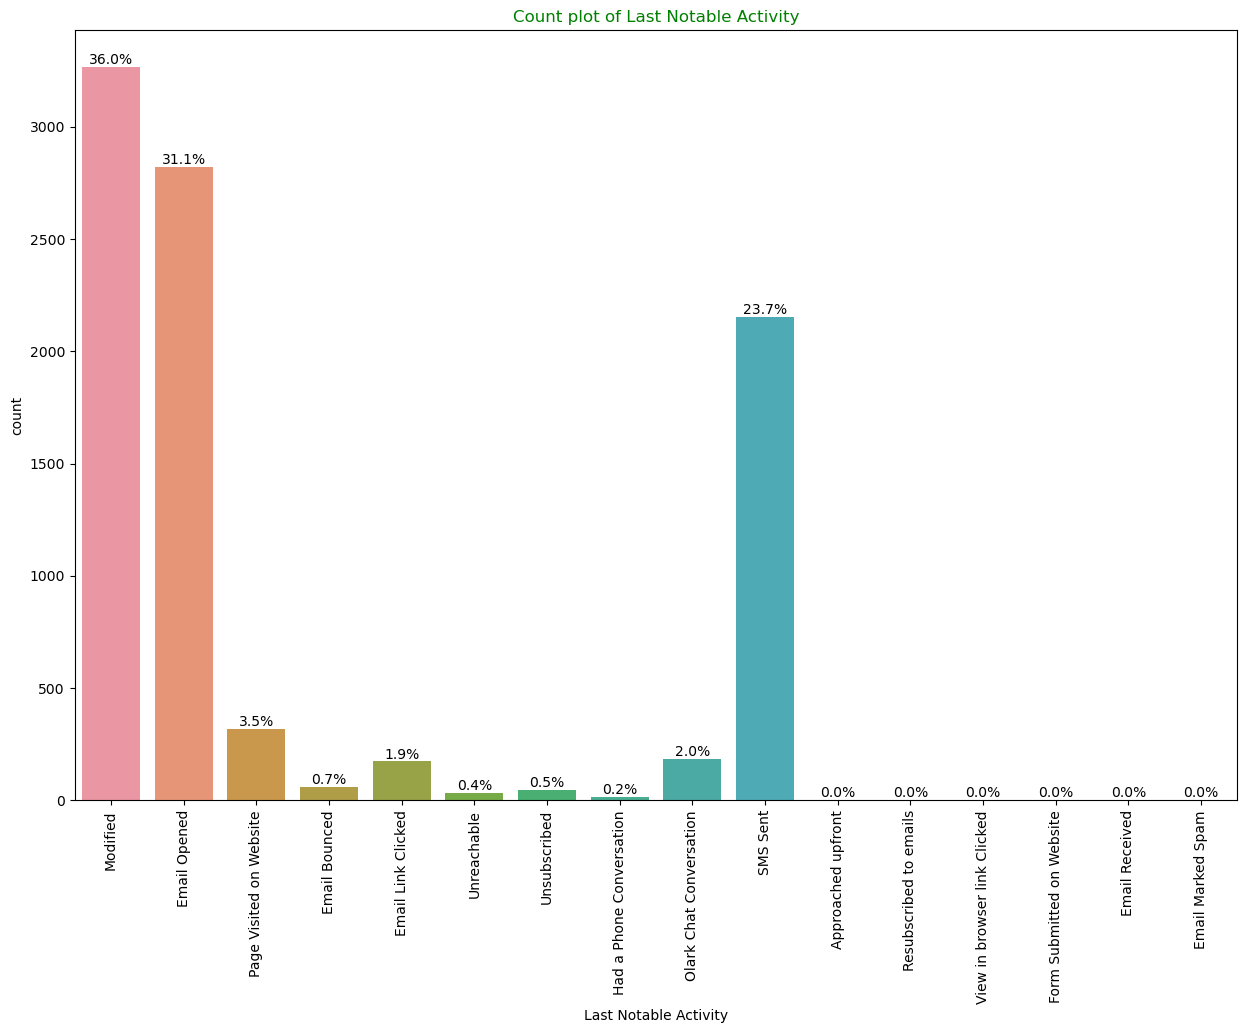

In [46]:
for i in categorical_cols[4:8]:
    
    plt.figure(figsize=[15,10])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [47]:
for i in categorical_cols[8:]:
    
    plt.figure(figsize=[15,10])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Important Insights from above graphs are:
    - Most of the leads origin from landing page submission.
    - Highest lead source is google.
    - Most of the leads are from India only.
    - Highest lead generating city is Mumbai

In [48]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=12)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="prism_r",alpha=0.46)
    
    total=len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=6)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

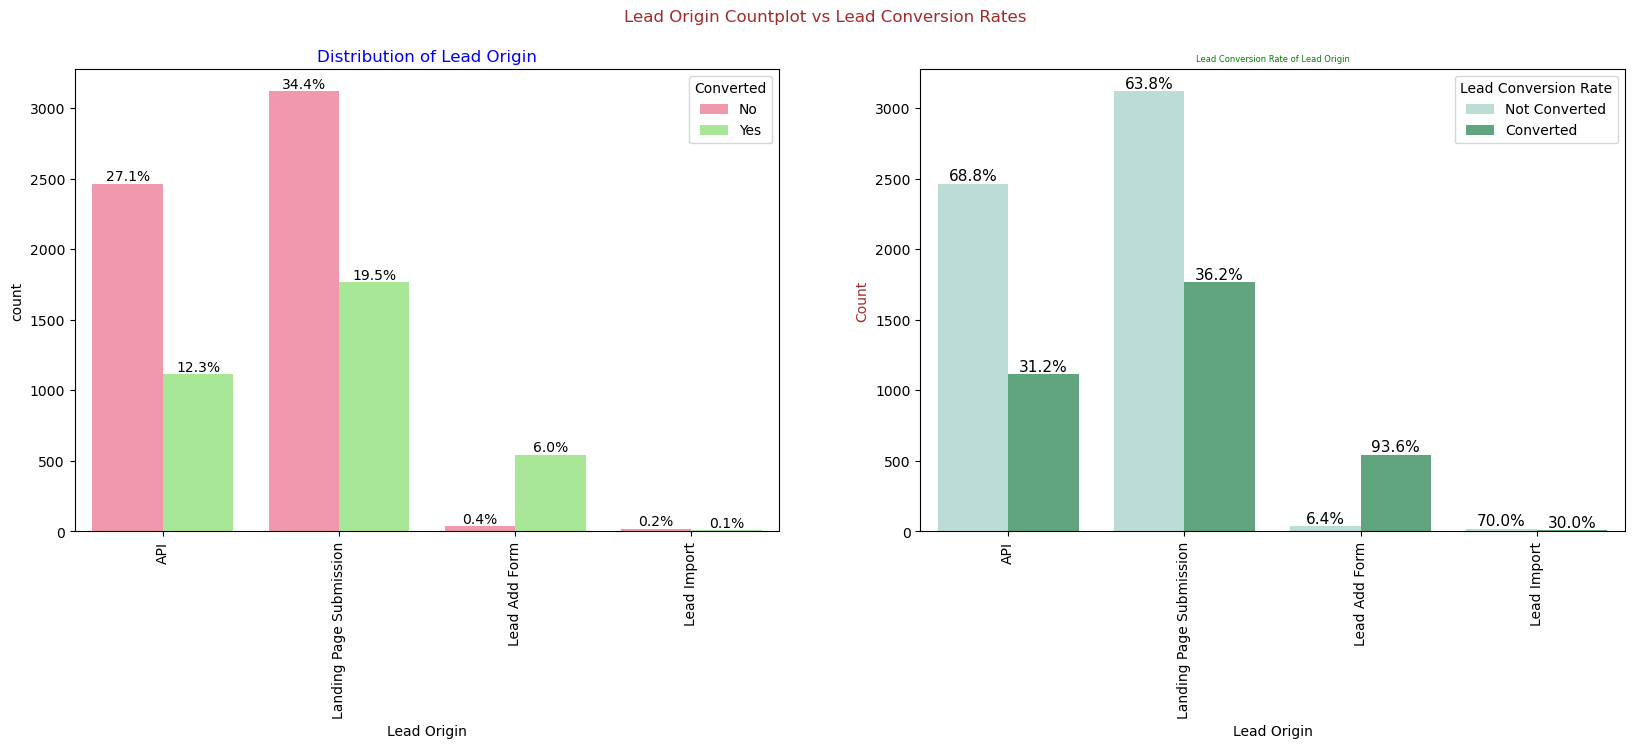

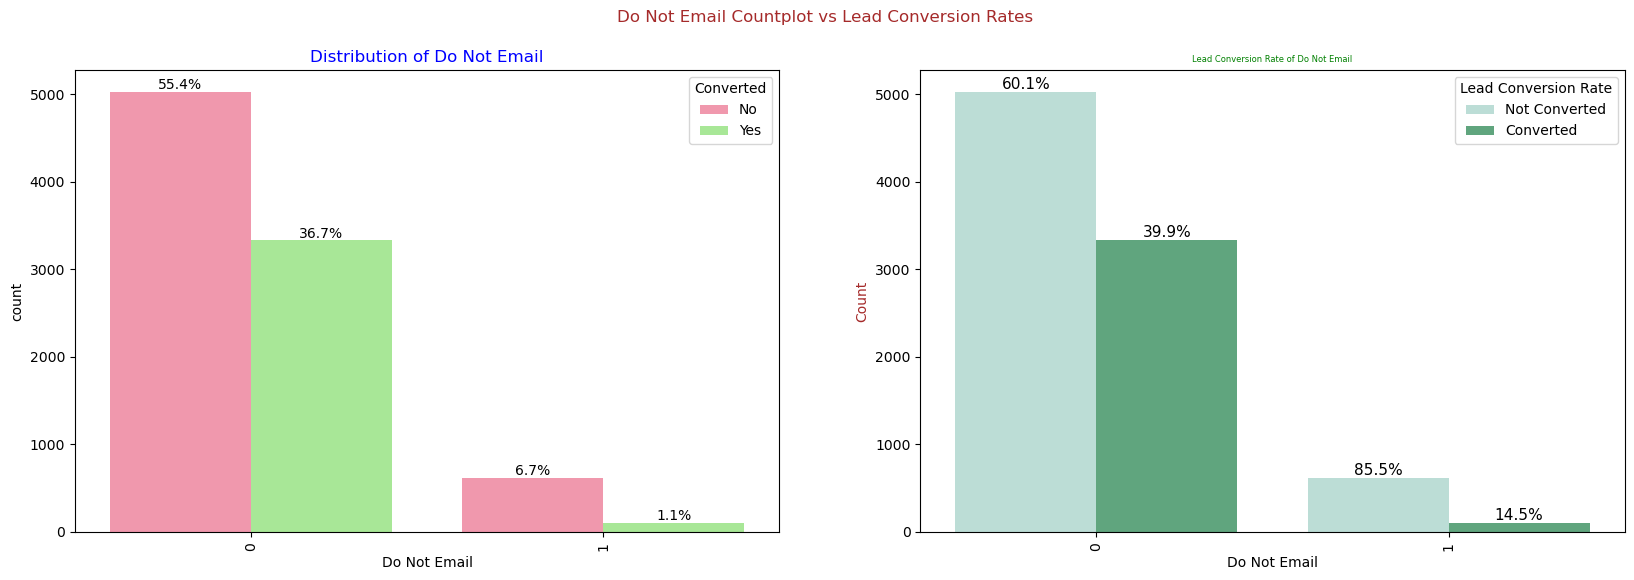

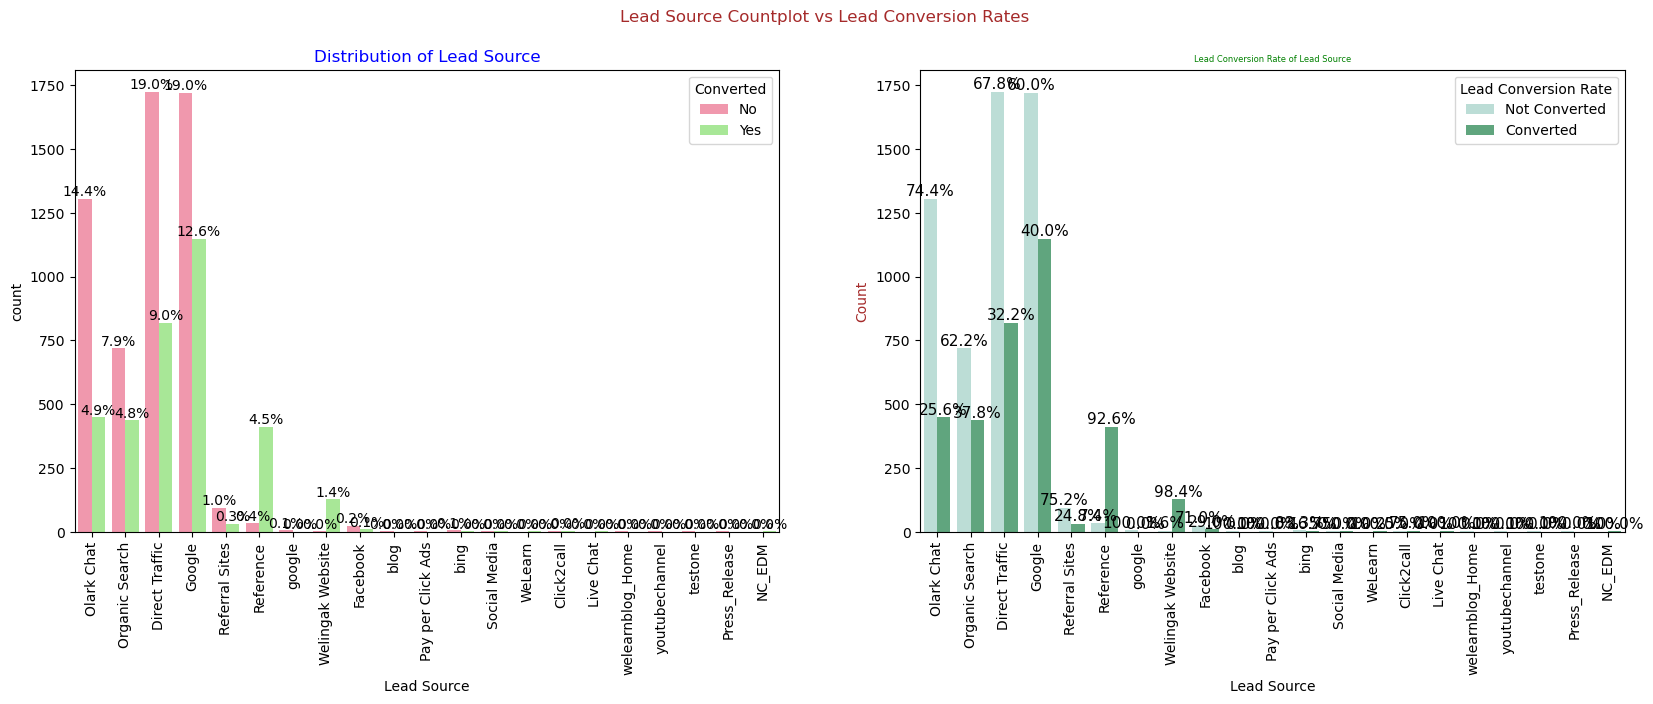

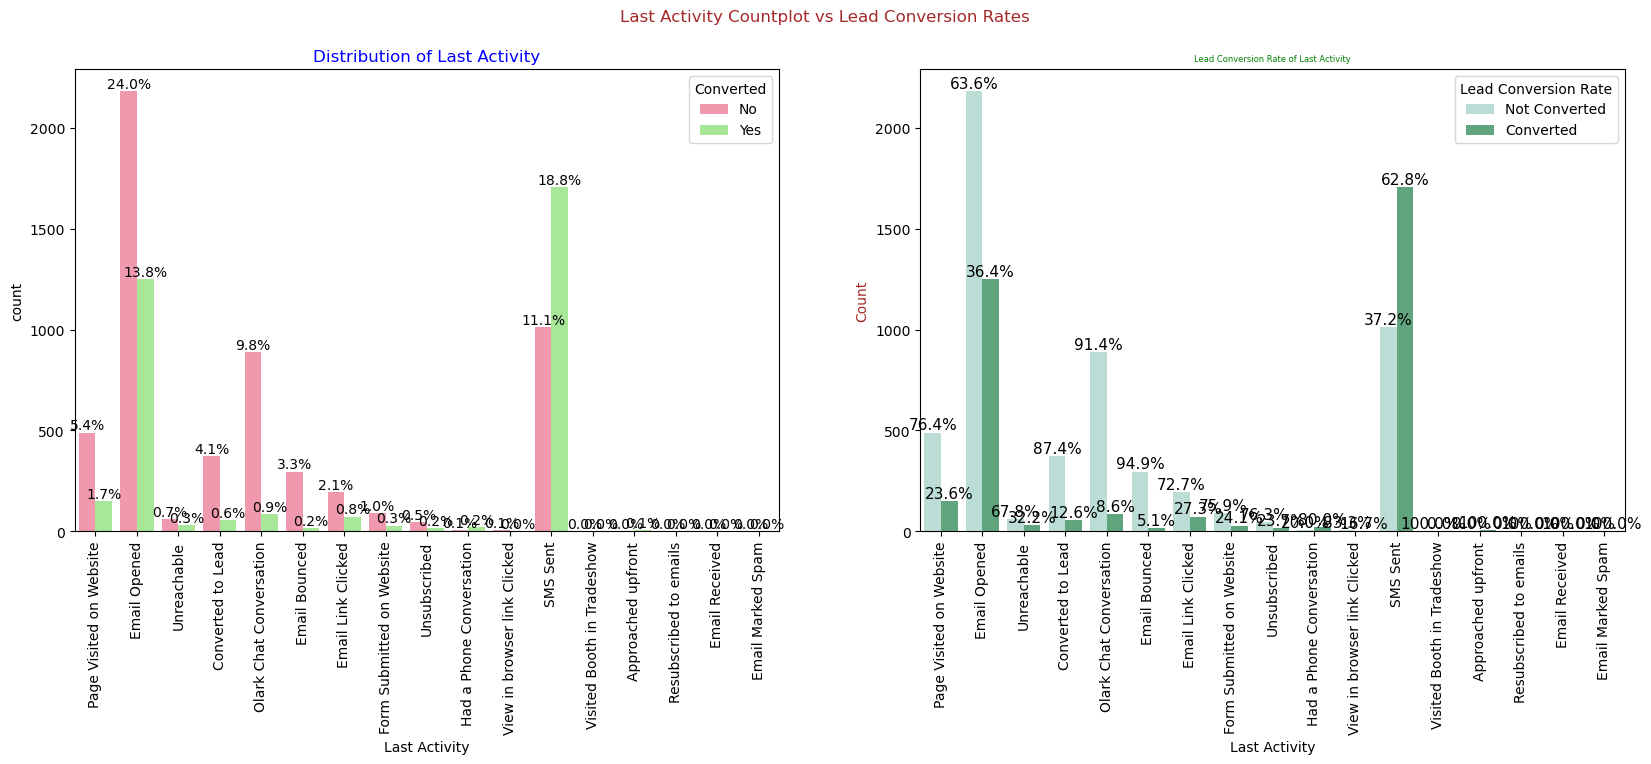

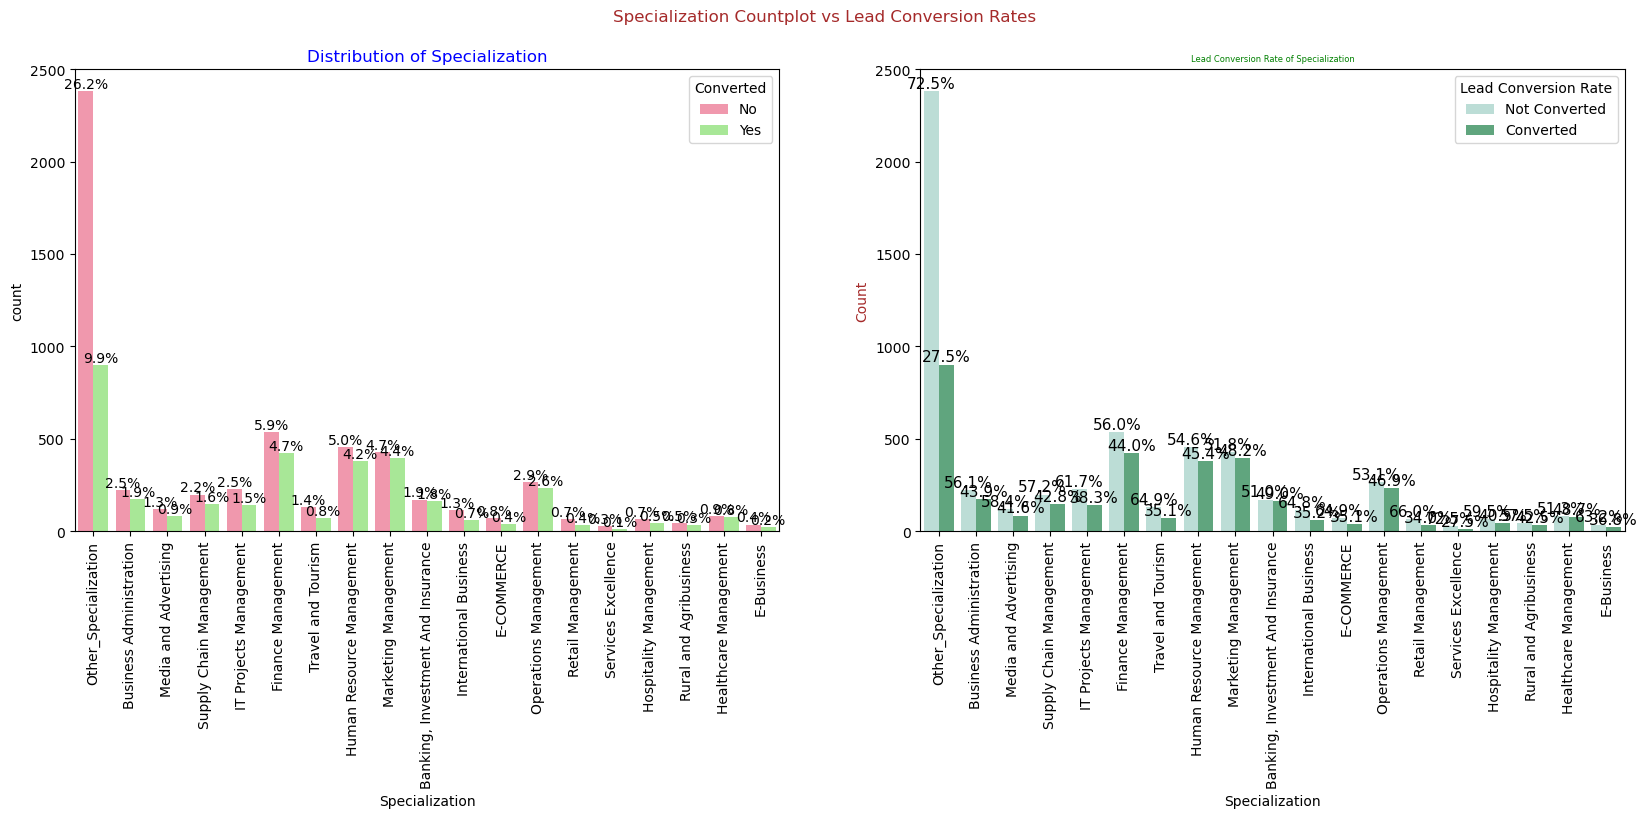

In [49]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'

cat_cols = ["Lead Origin","Do Not Email",
            "Lead Source","Last Activity","Specialization"]

for i in cat_cols:
    Bivariate_cat(df,variable_name=i)

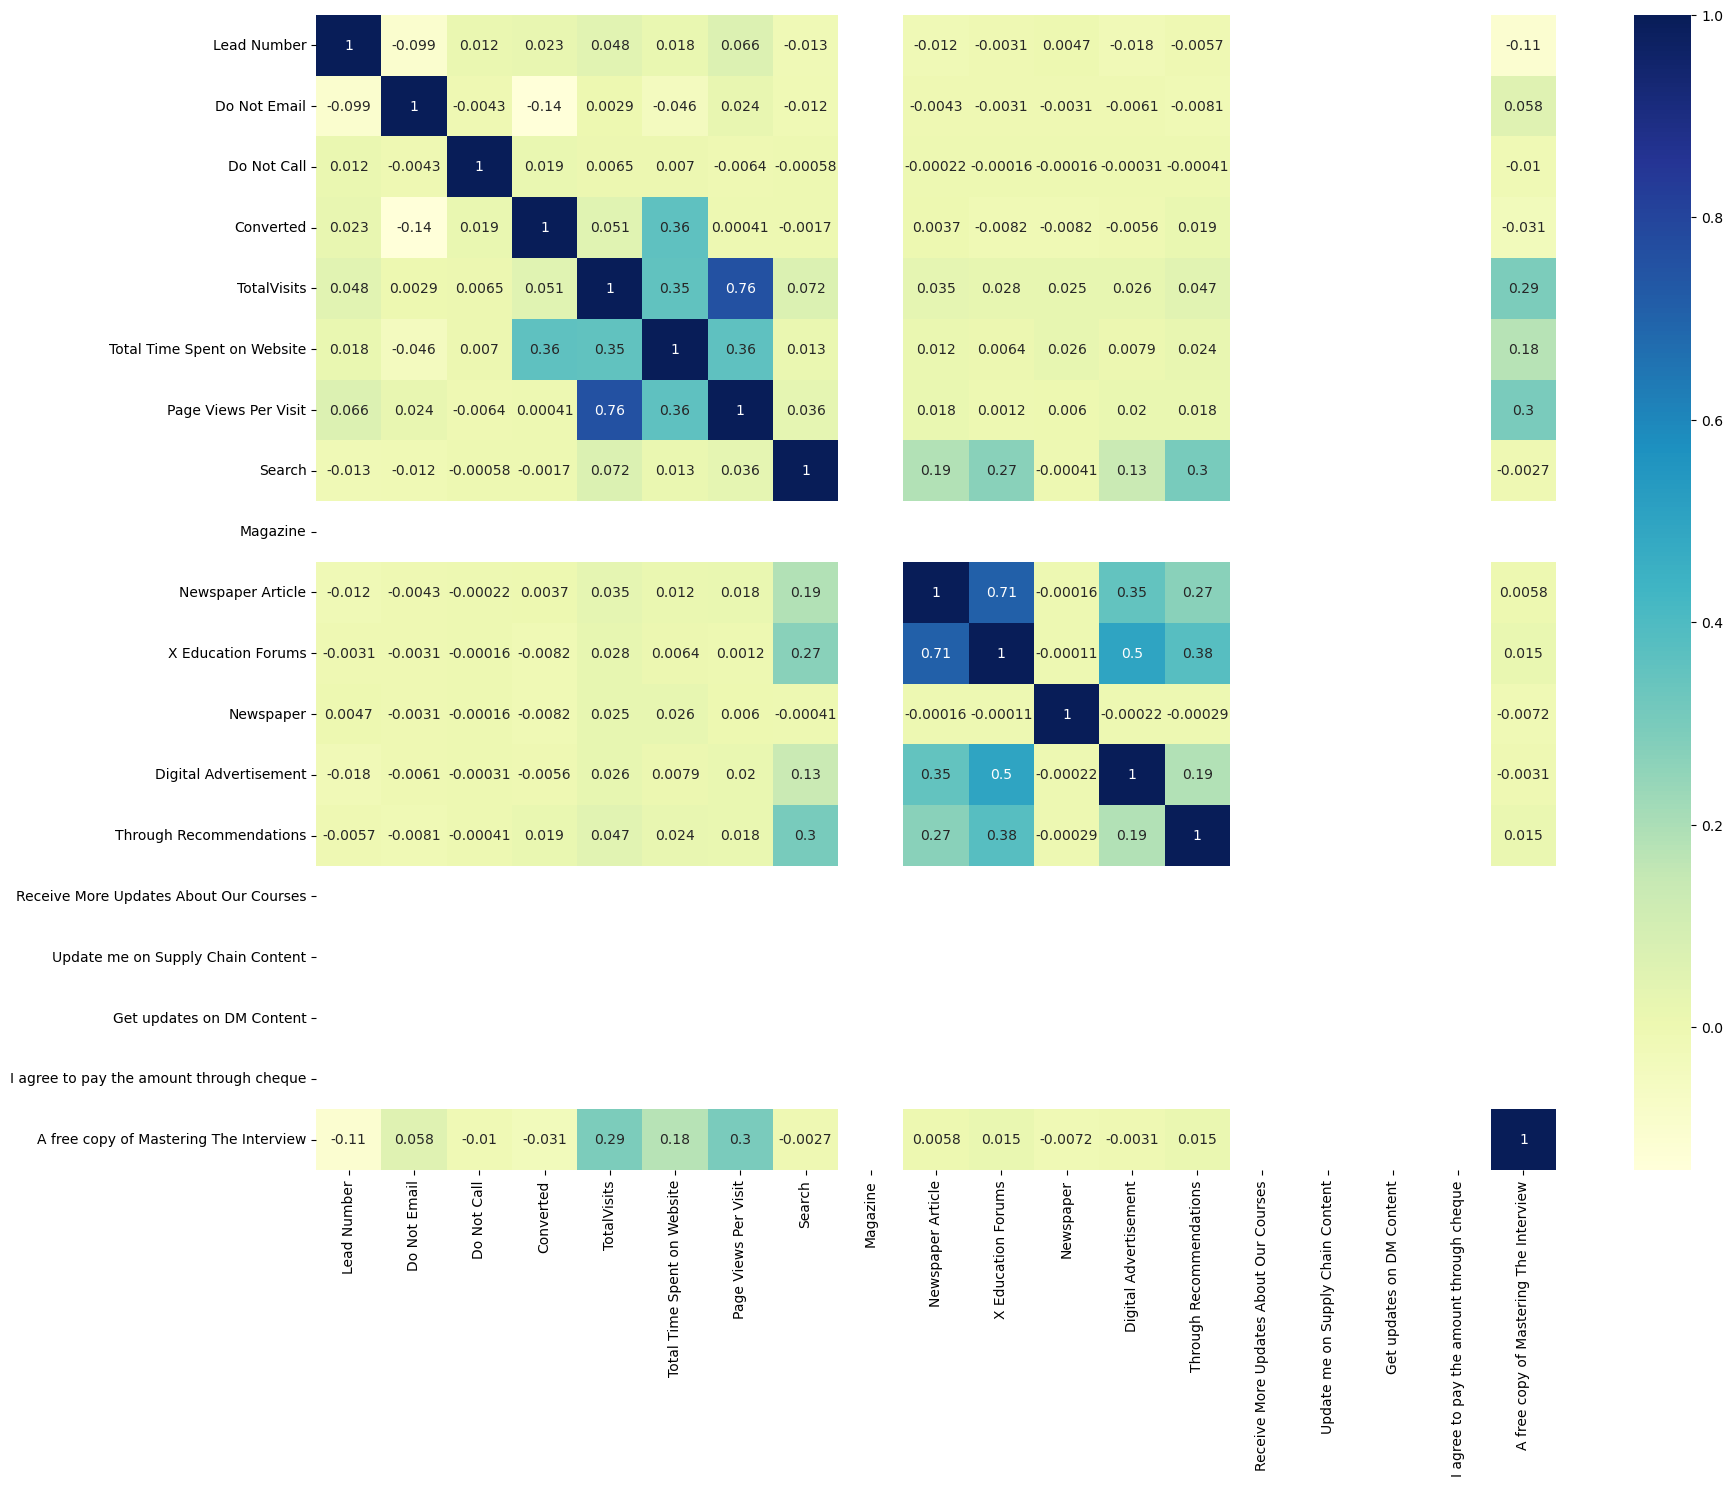

In [50]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

<Figure size 1600x400 with 0 Axes>

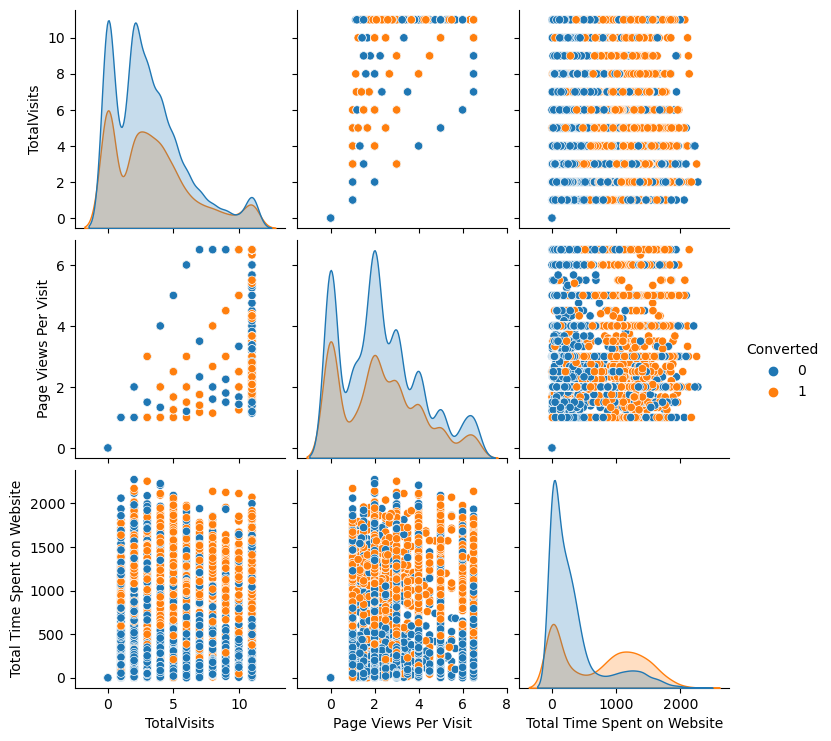

In [51]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=numerical_df,vars=num_cols,hue="Converted")                                  
plt.show()

In [52]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

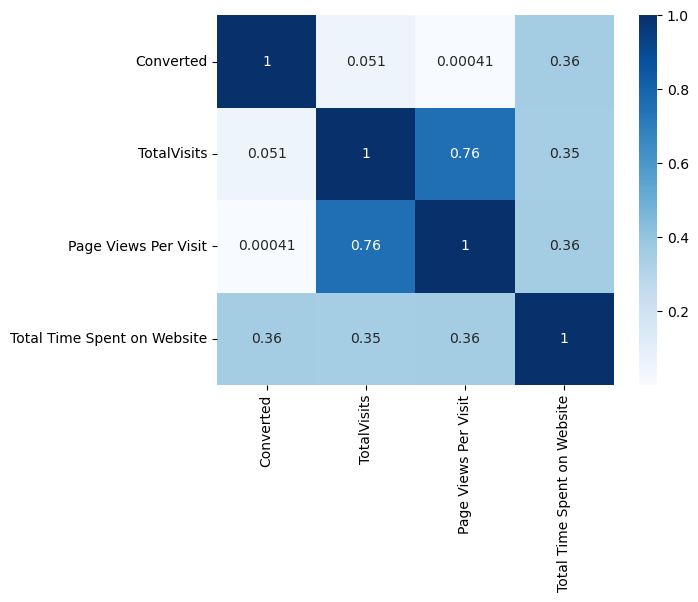

In [53]:
# Heatmap to show correlation between numerical variables

sns.heatmap(data=df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

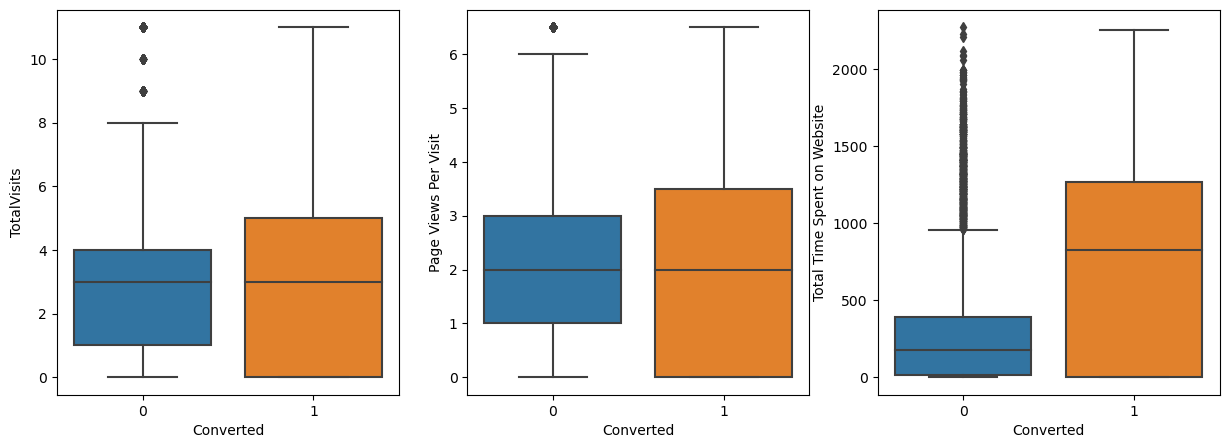

In [54]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

# Creating Dummy Variables

In [55]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization"]], drop_first=True)

# Adding the results to the master dataframe
dummy = dummy.astype(float)

df_dummy = pd.concat([df, dummy], axis=1)
df_dummy.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
columns_to_drop = [
    'What is your current occupation', 'Lead Origin', 'Lead Source', 
    'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 
    'Specialization_not provided', 'What matters most to you in choosing a course', 
    'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
    'Digital Advertisement', 'Through Recommendations', 
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

# Ensure all columns to be dropped exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df_dummy.columns]

# Drop the columns
df_dummy = df_dummy.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df_dummy)


      Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0          0.0                            0   
1          660728          0          5.0                          674   
2          660727          1          2.0                         1532   
3          660719          0          1.0                          305   
4          660681          1          2.0                         1428   
...           ...        ...          ...                          ...   
9235       579564          1          8.0                         1845   
9236       579546          0          2.0                          238   
9237       579545          0          2.0                          199   
9238       579538          1          3.0                          499   
9239       579533          1          6.0                         1279   

      Page Views Per Visit  Magazine  Receive More Updates About Our Courses  \
0                     0.00     

In [57]:
X = df_dummy.drop(['Converted'],axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,660728,5.0,674,2.5,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,660727,2.0,1532,2.0,0,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,660719,1.0,305,1.0,0,0,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,660681,2.0,1428,1.0,0,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
y = df_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Split the Dataset

In [59]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [60]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1289,646334,0.181818,0.612676,0.307692,0,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5584,607128,0.545455,0.751761,0.923077,0,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7563,591639,0.181818,0.787852,0.307692,0,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# checking the conversion rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

37.85541106458012

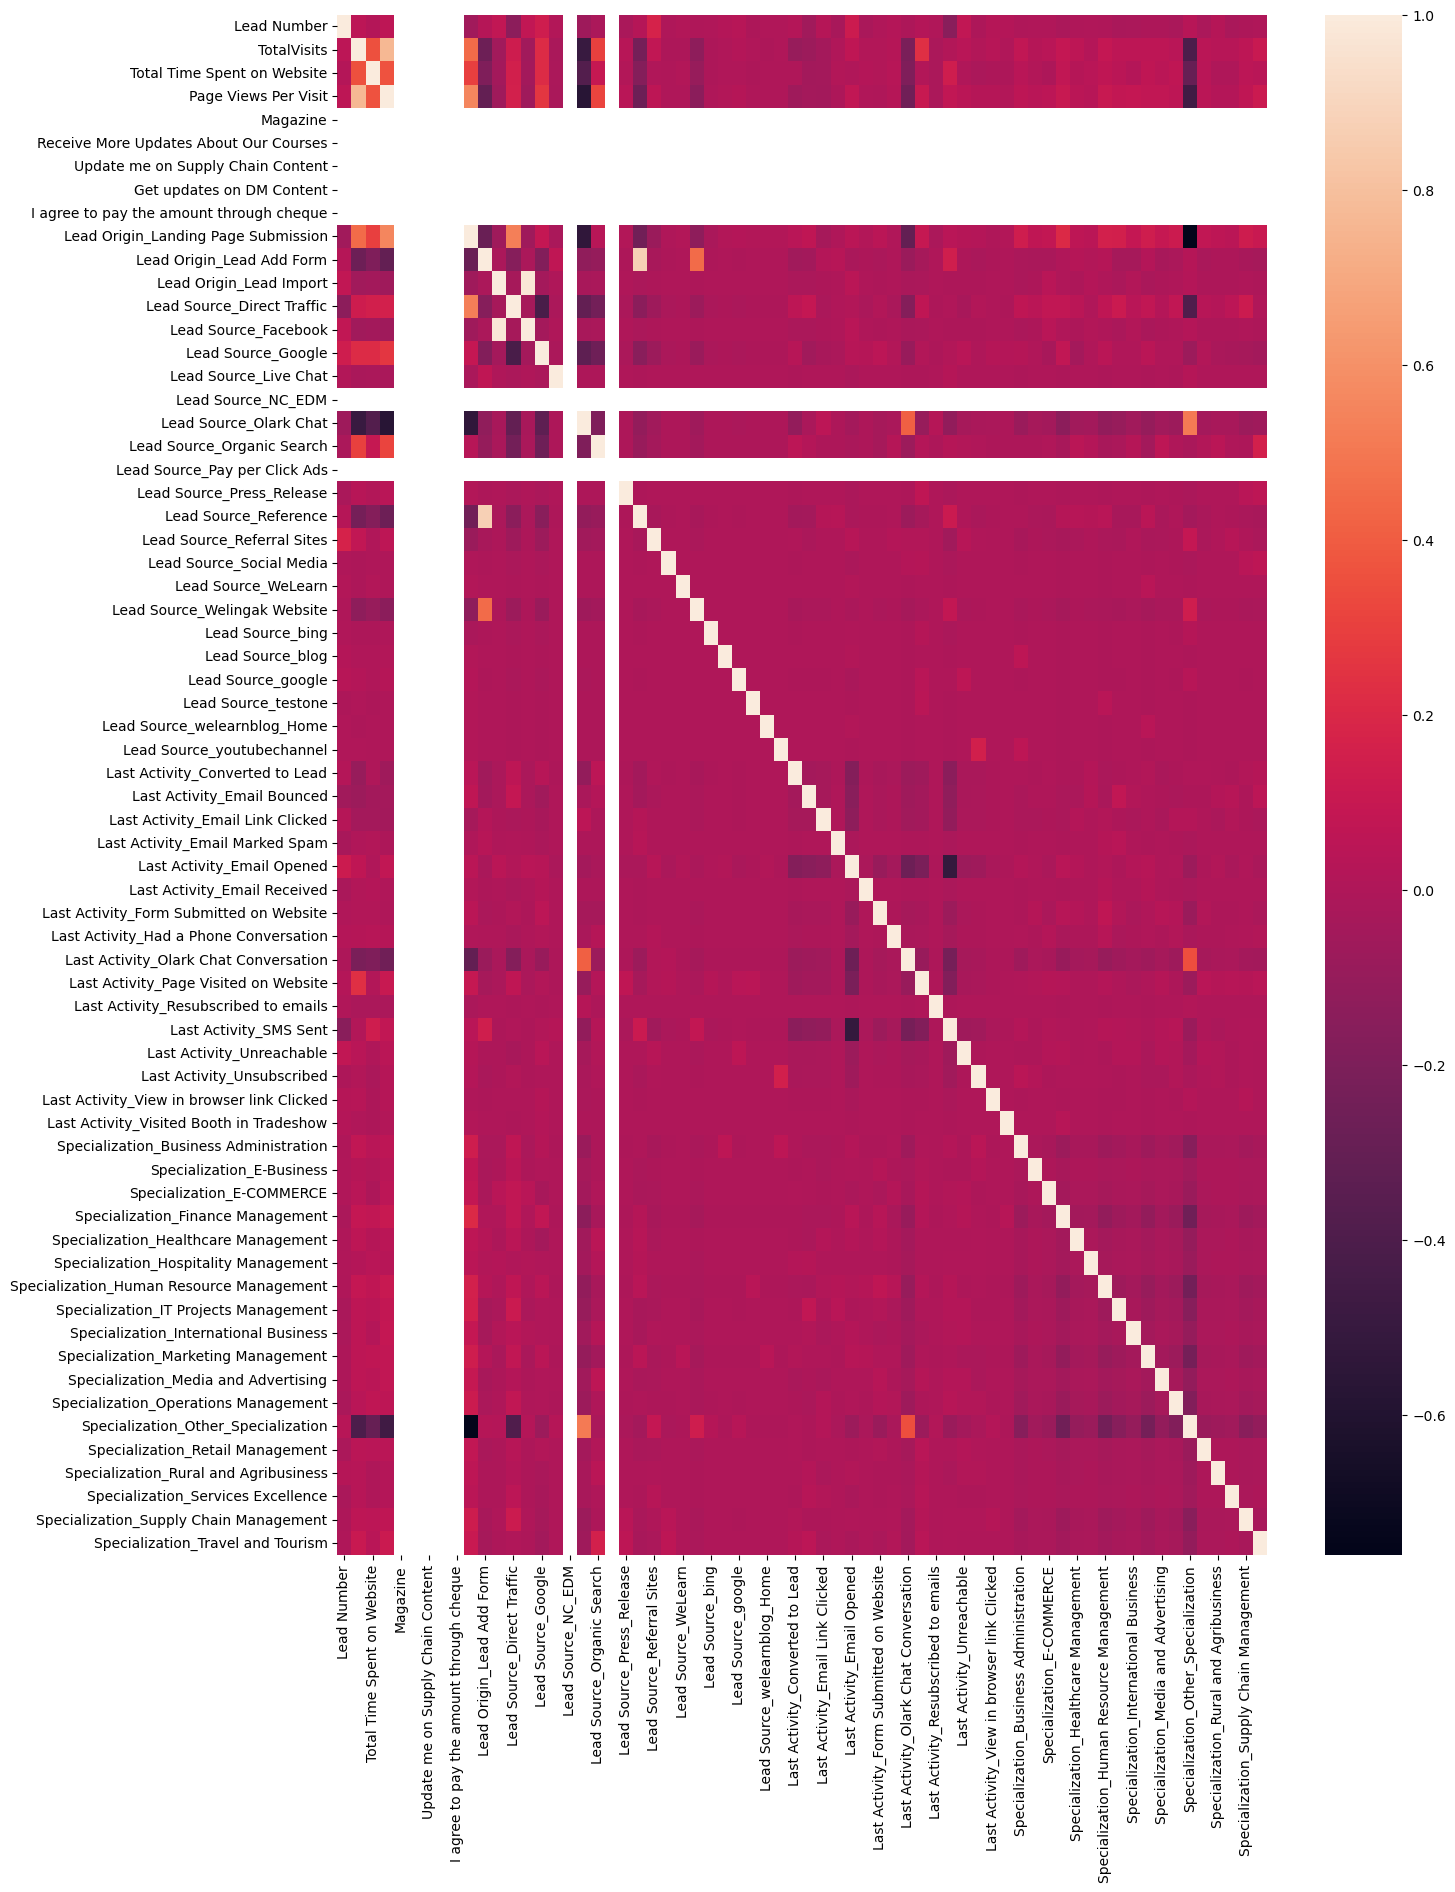

In [62]:
# To check the correlation among varibles
plt.figure(figsize=(15,20))
sns.heatmap(X_train.corr())
plt.show()

# Model Building

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create the logistic regression model
logreg = LogisticRegression()

# Create the RFE object with logistic regression and 13 features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Create the pipeline with an imputer
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('rfe', rfe),
    ('logreg', logreg)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Optionally, make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Magazine', False, 52),
 ('Receive More Updates About Our Courses', False, 50),
 ('Update me on Supply Chain Content', False, 49),
 ('Get updates on DM Content', False, 48),
 ('I agree to pay the amount through cheque', False, 47),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_NC_EDM', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 36),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 45),
 ('Lead Source

In [66]:
col = X_train.columns[rfe.support_]
X_train.columns[rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization'],
      dtype='object')

In [67]:
X_train = X_train[col]

In [68]:
# Importing statsmodels
import statsmodels.api as sm

In [69]:
boolean_columns = X_train.select_dtypes(include=['bool']).columns
X_train[boolean_columns] = X_train[boolean_columns].astype(int)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.8
Date:                Mon, 01 Jul 2024   Deviance:                       6493.6
Time:                        23:21:51   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3541
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.7473      0.875     -5.424      0.000      -6.463      -3.032
Lead Number                             5.81e-06   1.38e-06      4.219      0.000    3.11e-06    8.51e-06
TotalVisits                               0.0567      0.014      3.996      0.000       0.029       0.084
Total Time Spent on Website               0.0020   6.63e-05     30.148      0.000       0.002       0.002
Lead Origin_Landing Page Submission      -1.1702      0.120     -9.744      0.000      -1.406      -0.935
Lead Origin_Lead Add Form                 2.0549      1.165      1.764      0.078      -0.228       4.338
Lead Source_Direct Traffic               -0.1433      0.080     -1.785      0.074      -0.301       0.014
Lead Source_Olark Chat                    1.3264      0.123     10.783      0.000       1.085       1.568
Lead Source_Reference                     1.3823      1.179      1.172      0.241      -0.929       3.693
Lead Source_Welingak Website              3.8741      1.370      2.828      0.005       1.189       6.559
Last Activity_Converted to Lead          -0.7783      0.182     -4.269      0.000      -1.136      -0.421
Last Activity_Email Bounced              -2.0094      0.310     -6.478      0.000      -2.617      -1.401
Last Activity_Olark Chat Conversation    -1.6098      0.154    -10.475      0.000      -1.911      -1.309
Last Activity_Page Visited on Website    -0.7554      0.138     -5.493      0.000      -1.025      -0.486
Last Activity_SMS Sent                    1.1999      0.070     17.170      0.000       1.063       1.337
Specialization_Other_Specialization      -1.3908      0.113    -12.290      0.000      -1.613      -1.169
=========================================================================================================
"""

In [70]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,77.67
7,Lead Source_Reference,59.92
0,Lead Number,19.26
8,Lead Source_Welingak Website,18.76
3,Lead Origin_Landing Page Submission,8.05
14,Specialization_Other_Specialization,4.60
1,TotalVisits,4.19
6,Lead Source_Olark Chat,2.83
2,Total Time Spent on Website,2.35
5,Lead Source_Direct Traffic,1.98


In [72]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.8
Date:                Mon, 01 Jul 2024   Deviance:                       6493.6
Time:                        23:21:51   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3541
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.7473      0.875     -5.424      0.000      -6.463      -3.032
Lead Number                             5.81e-06   1.38e-06      4.219      0.000    3.11e-06    8.51e-06
TotalVisits                               0.0567      0.014      3.996      0.000       0.029       0.084
Total Time Spent on Website               0.0020   6.63e-05     30.148      0.000       0.002       0.002
Lead Origin_Landing Page Submission      -1.1702      0.120     -9.744      0.000      -1.406      -0.935
Lead Origin_Lead Add Form                 2.0549      1.165      1.764      0.078      -0.228       4.338
Lead Source_Direct Traffic               -0.1433      0.080     -1.785      0.074      -0.301       0.014
Lead Source_Olark Chat                    1.3264      0.123     10.783      0.000       1.085       1.568
Lead Source_Reference                     1.3823      1.179      1.172      0.241      -0.929       3.693
Lead Source_Welingak Website              3.8741      1.370      2.828      0.005       1.189       6.559
Last Activity_Converted to Lead          -0.7783      0.182     -4.269      0.000      -1.136      -0.421
Last Activity_Email Bounced              -2.0094      0.310     -6.478      0.000      -2.617      -1.401
Last Activity_Olark Chat Conversation    -1.6098      0.154    -10.475      0.000      -1.911      -1.309
Last Activity_Page Visited on Website    -0.7554      0.138     -5.493      0.000      -1.025      -0.486
Last Activity_SMS Sent                    1.1999      0.070     17.170      0.000       1.063       1.337
Specialization_Other_Specialization      -1.3908      0.113    -12.290      0.000      -1.613      -1.169
=========================================================================================================
"""

In [73]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,77.67
7,Lead Source_Reference,59.92
0,Lead Number,19.26
8,Lead Source_Welingak Website,18.76
3,Lead Origin_Landing Page Submission,8.05
14,Specialization_Other_Specialization,4.60
1,TotalVisits,4.19
6,Lead Source_Olark Chat,2.83
2,Total Time Spent on Website,2.35
5,Lead Source_Direct Traffic,1.98


In [74]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [75]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3248.8
Date:                Mon, 01 Jul 2024   Deviance:                       6497.5
Time:                        23:21:51   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.7795      0.875     -5.463      0.000      -6.494      -3.065
Lead Number                             5.89e-06   1.38e-06      4.280      0.000    3.19e-06    8.59e-06
TotalVisits                               0.0557      0.014      3.929      0.000       0.028       0.083
Total Time Spent on Website               0.0020   6.62e-05     30.146      0.000       0.002       0.002
Lead Origin_Landing Page Submission      -1.1812      0.120     -9.846      0.000      -1.416      -0.946
Lead Source_Direct Traffic               -0.1441      0.080     -1.795      0.073      -0.301       0.013
Lead Source_Olark Chat                    1.3179      0.123     10.737      0.000       1.077       1.558
Lead Source_Reference                     3.4224      0.225     15.194      0.000       2.981       3.864
Lead Source_Welingak Website              5.9177      0.731      8.095      0.000       4.485       7.351
Last Activity_Converted to Lead          -0.7826      0.182     -4.293      0.000      -1.140      -0.425
Last Activity_Email Bounced              -2.0109      0.310     -6.484      0.000      -2.619      -1.403
Last Activity_Olark Chat Conversation    -1.6128      0.154    -10.496      0.000      -1.914      -1.312
Last Activity_Page Visited on Website    -0.7522      0.137     -5.479      0.000      -1.021      -0.483
Last Activity_SMS Sent                    1.2015      0.070     17.195      0.000       1.065       1.338
Specialization_Other_Specialization      -1.3975      0.113    -12.357      0.000      -1.619      -1.176
=========================================================================================================
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,19.21
3,Lead Origin_Landing Page Submission,8.03
13,Specialization_Other_Specialization,4.60
1,TotalVisits,4.18
5,Lead Source_Olark Chat,2.83
2,Total Time Spent on Website,2.35
4,Lead Source_Direct Traffic,1.98
12,Last Activity_SMS Sent,1.71
6,Lead Source_Reference,1.68
10,Last Activity_Olark Chat Conversation,1.49


In [77]:
X_train.drop('Lead Number', axis = 1, inplace = True)

# Predicting

In [78]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

687     0.250788
1435    0.398627
2329    0.877479
2310    0.461929
613     0.067917
1610    0.521068
2182    0.335426
8226    0.804843
7080    0.462193
4083    0.081624
dtype: float64

In [79]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
687,0,0.250788
1435,0,0.398627
2329,0,0.877479
2310,0,0.461929
613,1,0.067917


In [80]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
687,0,0.250788,0
1435,0,0.398627,0
2329,0,0.877479,1
2310,0,0.461929,0
613,1,0.067917,0


In [81]:
 #Importing metrics from sklearn for evaluation
from sklearn import metrics

In [82]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3933,  541],
       [ 939, 1846]])

In [83]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7961151673784268

In [84]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [85]:
# Calculating the specificity
TN/(TN+FP)

0.8790791238265534

# Optimising Cutoff(ROC Curve)

In [86]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

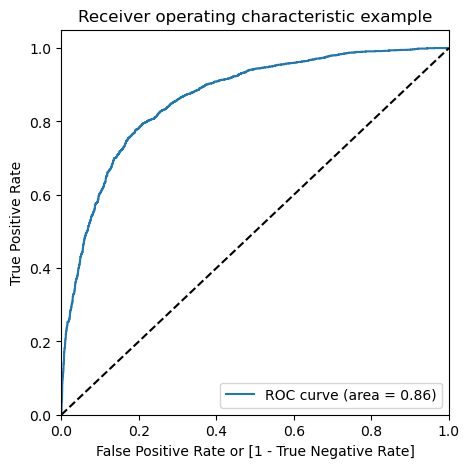

In [88]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [89]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
687,0,0.250788,0,1,1,1,0,0,0,0,0,0,0
1435,0,0.398627,0,1,1,1,1,0,0,0,0,0,0
2329,0,0.877479,1,1,1,1,1,1,1,1,1,1,0
2310,0,0.461929,0,1,1,1,1,1,0,0,0,0,0
613,1,0.067917,0,1,0,0,0,0,0,0,0,0,0


In [90]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.383662,1.000000,0.000000
0.1,0.1,0.571980,0.973788,0.321860
0.2,0.2,0.699959,0.918133,0.564148
0.3,0.3,0.775038,0.829084,0.741395
0.4,0.4,0.796666,0.764093,0.816942
0.5,0.5,0.796115,0.662837,0.879079
0.6,0.6,0.779446,0.563375,0.913947
0.7,0.7,0.759747,0.466068,0.942557
0.8,0.8,0.725031,0.337522,0.966249
0.9,0.9,0.684943,0.194255,0.990389


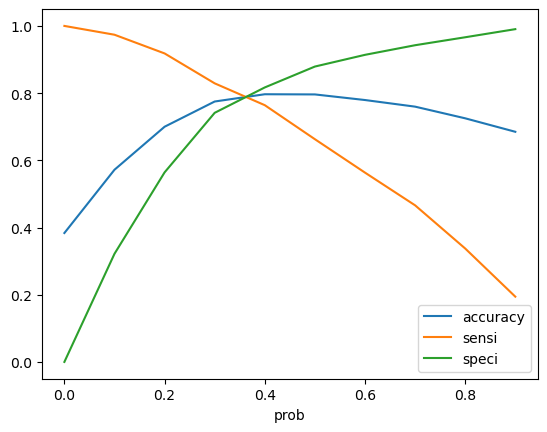

In [91]:

# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
687,0,0.250788,0,1,1,1,0,0,0,0,0,0,0,0
1435,0,0.398627,0,1,1,1,1,0,0,0,0,0,0,1
2329,0,0.877479,1,1,1,1,1,1,1,1,1,1,0,1
2310,0,0.461929,0,1,1,1,1,1,0,0,0,0,0,1
613,1,0.067917,0,1,0,0,0,0,0,0,0,0,0,0


In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7852321256371401

In [94]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3466, 1008],
       [ 551, 2234]])

In [95]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [96]:
# Calculating the sensitivity
TP/(TP+FN)

0.8021543985637343

In [97]:
# Calculating the specificity
TN/(TN+FP)

0.7746982565936522

# Prediction on Test Set

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3933,  541],
       [ 939, 1846]])

In [99]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7733556765814831

In [100]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6628366247755835

In [101]:
from sklearn.metrics import precision_recall_curve

In [102]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(687     0
 1435    0
 2329    0
 2310    0
 613     1
        ..
 4936    0
 7434    0
 1399    0
 7436    0
 1342    1
 Name: Converted, Length: 7259, dtype: int64,
 687     0
 1435    0
 2329    1
 2310    0
 613     0
        ..
 4936    0
 7434    0
 1399    0
 7436    0
 1342    0
 Name: Predicted, Length: 7259, dtype: int64)

In [103]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

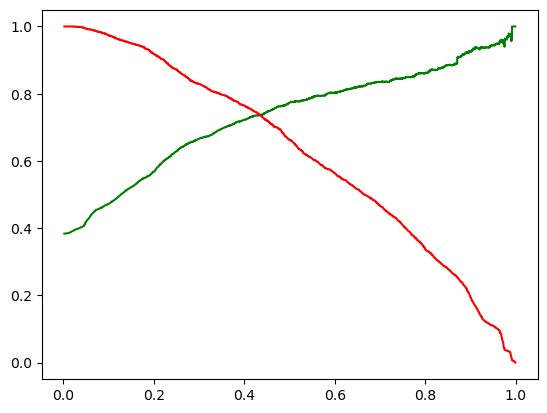

In [104]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
687,0,0.250788,0,1,1,1,0,0,0,0,0,0,0,0
1435,0,0.398627,0,1,1,1,1,0,0,0,0,0,0,1
2329,0,0.877479,1,1,1,1,1,1,1,1,1,1,0,1
2310,0,0.461929,0,1,1,1,1,1,0,0,0,0,0,1
613,1,0.067917,0,1,0,0,0,0,0,0,0,0,0,0


In [106]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7926711668273867

In [107]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3565,  909],
       [ 596, 2189]])

In [108]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [109]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7065848934796642

In [110]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7859964093357271

# Conclusion:
- It was found that the variables that mattered the most in the potential buyers are  :
- Lead Origin
- Lead Source
- Total no. of visits.
- When the last activity was:
- SMS
- Olark chat conversation
- When their current occupation is as a working professional.Keeping these in mind the X Education can flourish as they have a     very high chance to get almost all the potential buyers to change their mind and buy their courses.